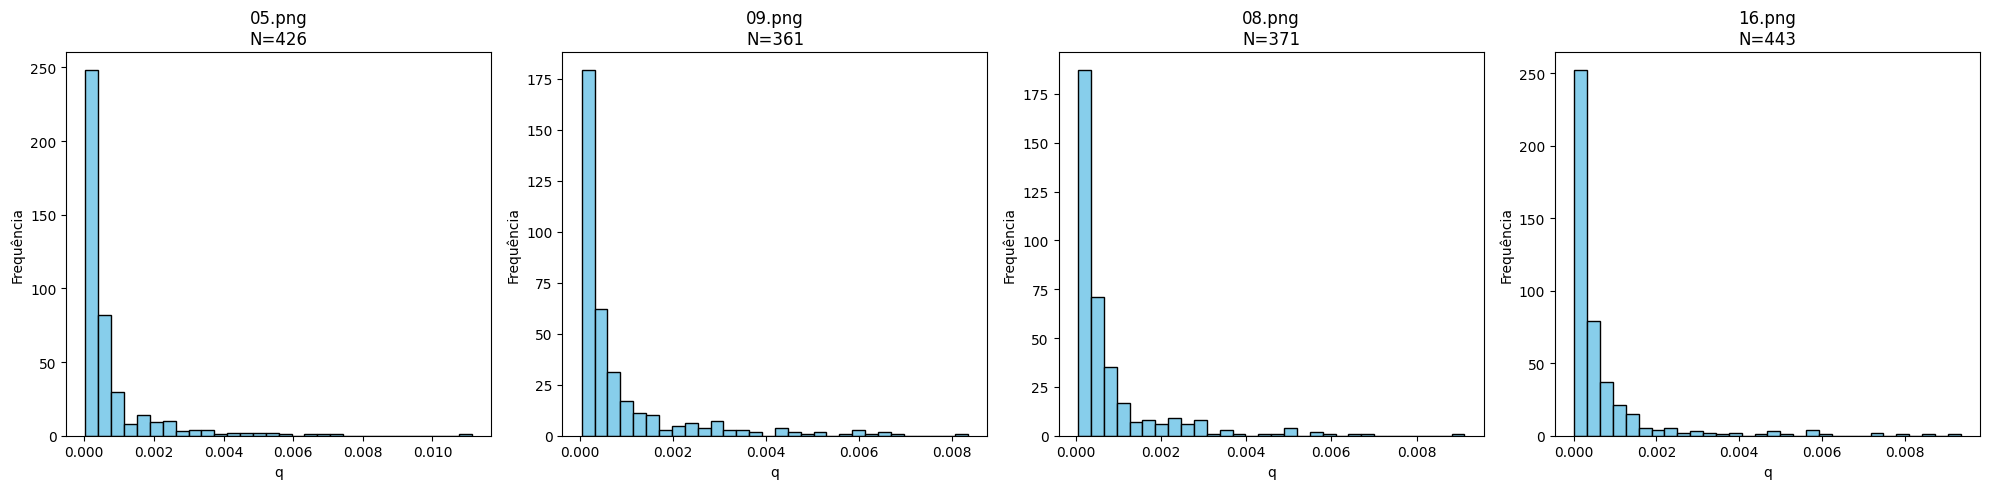

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# Caminho do JSON com os contornos e valores de q
json_path = "dataset_contours_aggregate.json"

# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Lista de imagens disponíveis no JSON
image_keys = list(contours_data.keys())

# Seleciona aleatoriamente 4 imagens para plot
selected_images = random.sample(image_keys, 4)

# Cria subplots 1 linha, 4 colunas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_name in enumerate(selected_images):
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    
    axes[i].hist(q_values, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{image_name}\nN={len(q_values)}")
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


In [5]:
# Lista para armazenar os resultados estatísticos
stats = []

for image_name in image_keys:
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    mean_q = np.mean(q_values)
    std_q = np.std(q_values)
    stats.append({
        "imagem": image_name,
        "n_agregados": len(q_values),
        "media_q": mean_q,
        "desvio_padrao_q": std_q
    })

# Cria um DataFrame com os resultados
df_stats = pd.DataFrame(stats)

print(df_stats)

df_stats.to_excel("estatisticas_q.xlsx", index=False)


    imagem  n_agregados   media_q  desvio_padrao_q
0   01.png          376  0.000835         0.001508
1   02.png          321  0.000706         0.000746
2   03.png          560  0.000546         0.000924
3   04.png          339  0.000789         0.001226
4   05.png          426  0.000743         0.001182
5   06.png          435  0.000681         0.001076
6   07.png          355  0.000853         0.001445
7   08.png          371  0.000808         0.001190
8   09.png          361  0.000865         0.001341
9   10.png          364  0.000825         0.000990
10  11.png          322  0.000870         0.001237
11  12.png          323  0.000818         0.001023
12  13.png          568  0.000543         0.000998
13  14.png          504  0.000591         0.001020
14  15.png          526  0.000584         0.001126
15  16.png          443  0.000682         0.001237
16  17.png          445  0.000597         0.000952
